In [630]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [631]:
movies = pd.read_csv('tmdb_movies.csv')
genres = pd.read_csv('tmdb_genres.csv')

1. Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [632]:
movies.drop(['homepage','original_language','overview','status','tagline','original_title'], axis=1, inplace=True)
Q3=movies['vote_count'].quantile(0.75)
Q3
zadanie1 = (movies[movies['vote_count']>Q3]).sort_values('vote_average',ascending=False).head(10)
zadanie1

,Unnamed: 0,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre_id
1881,1881,25000000,278,136.747729,1994-09-23,28341469,142.0,The Shawshank Redemption,8.5,8205,18.0
3337,3337,6000000,238,143.659698,1972-03-14,245066411,175.0,The Godfather,8.4,5893,18.0
2294,2294,15000000,129,118.968562,2001-07-20,274925095,125.0,Spirited Away,8.3,3840,14.0
3865,3865,3300000,244786,192.528841,2014-10-10,13092000,105.0,Whiplash,8.3,4254,18.0
2731,2731,13000000,240,105.792936,1974-12-20,47542841,200.0,The Godfather: Part II,8.3,3338,18.0
3232,3232,8000000,680,121.463076,1994-10-08,213928762,154.0,Pulp Fiction,8.3,8428,53.0
1818,1818,22000000,424,104.469351,1993-11-29,321365567,195.0,Schindler's List,8.3,4329,18.0
662,662,63000000,550,146.757391,1999-10-15,100853753,139.0,Fight Club,8.3,9413,18.0
2170,2170,806948,539,93.067866,1960-06-16,32000000,109.0,Psycho,8.2,2320,18.0
1847,1847,25000000,769,63.654244,1990-09-12,46836394,145.0,GoodFellas,8.2,3128,18.0


In [633]:
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['release_date'] = movies['release_date'].dt.year
by_release_date = movies.groupby('release_date').mean().round(3)
zadanie2 = by_release_date['2010.0' : '2016.0'][['budget', 'revenue']]
zadanie2


C:\Users\kulin\AppData\Local\Temp\ipykernel_2624\2538435417.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_release_date = movies.groupby('release_date').mean().round(3)


,budget,revenue
release_date,,
2010.0,3.449541e+07,9.043811e+07
2011.0,3.477232e+07,9.200413e+07
2012.0,3.492203e+07,1.160659e+08
2013.0,3.552329e+07,1.013485e+08
2014.0,3.095989e+07,1.013466e+08
2015.0,3.113216e+07,1.054399e+08
2016.0,4.570327e+07,1.390496e+08


In [634]:
zadanie2 = zadanie2.reset_index()
zadanie2

,release_date,budget,revenue
0,2010.0,3.449541e+07,9.043811e+07
1,2011.0,3.477232e+07,9.200413e+07
2,2012.0,3.492203e+07,1.160659e+08
3,2013.0,3.552329e+07,1.013485e+08
4,2014.0,3.095989e+07,1.013466e+08
5,2015.0,3.113216e+07,1.054399e+08
6,2016.0,4.570327e+07,1.390496e+08


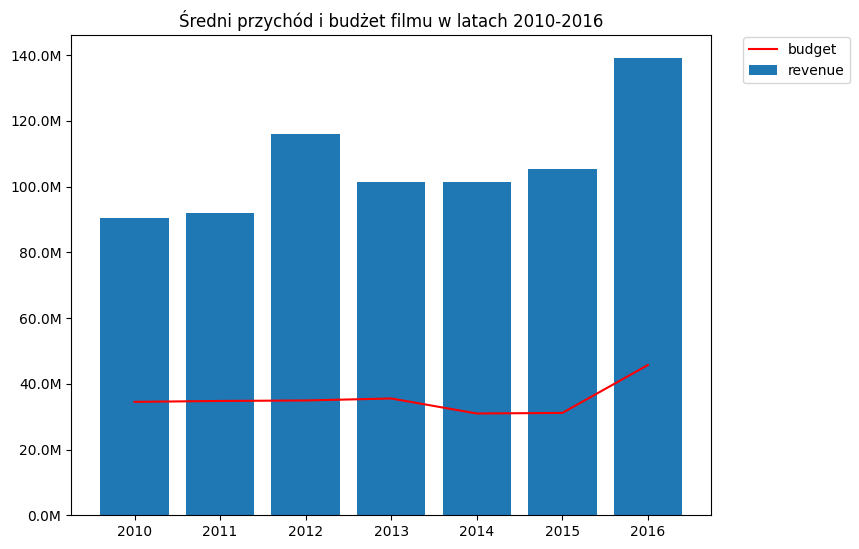

In [635]:
def million(x, pos):
        return '{:2.1f}M'.format(x*1e-6)

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(zadanie2['release_date'],zadanie2['budget'],label='budget',color = 'red')
axes.bar (zadanie2['release_date'],zadanie2['revenue'],label='revenue')
axes.legend(loc=(1.05,0.9))
axes.set_title('Średni przychód i budżet filmu w latach 2010-2016')
formatter = plt.FuncFormatter(million)
axes.yaxis.set_major_formatter(formatter)

3. Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [641]:
genres.rename(columns={'Unnamed: 0':'genre_id'}, inplace=True)
zadanie3=movies.set_index('genre_id').join(genres.set_index('genre_id'))
zadanie3

,Unnamed: 0,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genres
genre_id,,,,,,,,,,,
12.0,1,300000000,285,139.082615,2007.0,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Adventure
12.0,8,250000000,767,98.885637,2009.0,933959197,153.0,Harry Potter and the Half-Blood Prince,7.4,5293,Adventure
12.0,10,270000000,1452,57.925623,2006.0,391081192,154.0,Superman Returns,5.4,1400,Adventure
12.0,11,200000000,10764,107.928811,2008.0,586090727,106.0,Quantum of Solace,6.1,2965,Adventure
12.0,12,200000000,58,145.847379,2006.0,1065659812,151.0,Pirates of the Caribbean: Dead Man's Chest,7.0,5246,Adventure
...,...,...,...,...,...,...,...,...,...,...,...
NaN,4674,0,194588,0.004998,2004.0,0,85.0,Short Cut to Nirvana: Kumbh Mela,0.0,0,NaN
NaN,4681,0,176074,0.472123,2015.0,0,92.0,Reality Show,5.5,2,NaN
NaN,4714,0,282128,0.015697,2014.0,0,89.0,An American in Hollywood,0.0,0,NaN


4. Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [637]:
zadanie4 = zadanie3.pivot_table(values = 'Unnamed: 0', index = 'genres', aggfunc='count')
zadanie4.sort_values(by='Unnamed: 0', ascending=False)

,Unnamed: 0
genres,
Drama,1207
Comedy,1042
Action,754
Adventure,339
Horror,300
Crime,195
Thriller,194
Animation,123
Fantasy,117


5. Filmy, którego gatunku trwają średnio najdłużej (runtime)?

In [638]:
zadanie5 = zadanie3.pivot_table(values = 'runtime', index = 'genres', aggfunc='mean')
zadanie5.sort_values(by='runtime', ascending=False).round(2) # prawdę mówiąc nie wiem, jak pokazywać wynik w liczbach całkowitych

,runtime
genres,
History,133.96
War,126.12
Western,117.93
Drama,115.52
Adventure,113.06
Crime,112.14
TV Movie,110.50
Action,109.06
Science Fiction,109.03


6. Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

In [639]:
zadanie3.set_index(['genres','runtime'],inplace = True)
zadanie6 = zadanie3.loc['History']
zadanie6.reset_index(inplace = True)

<AxesSubplot: >

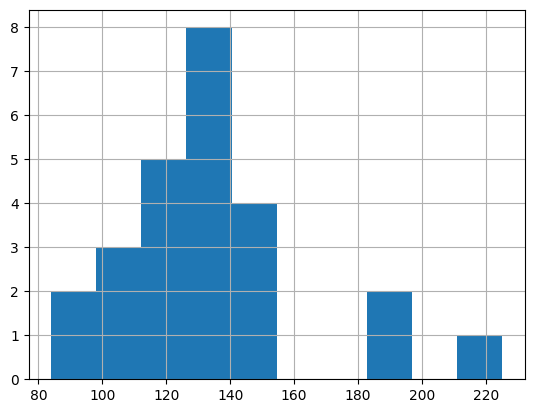

In [640]:
zadanie6['runtime'].hist(bins=10)